In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

In [2]:
data=pd.read_csv('../data/realdonaldtrump.csv')


In [3]:
data.shape


(43352, 8)

In [4]:
data.head()

id                                               link  \
0  1698308935  https://twitter.com/realDonaldTrump/status/169...   
1  1701461182  https://twitter.com/realDonaldTrump/status/170...   
2  1737479987  https://twitter.com/realDonaldTrump/status/173...   
3  1741160716  https://twitter.com/realDonaldTrump/status/174...   
4  1773561338  https://twitter.com/realDonaldTrump/status/177...   

                                             content                 date  \
0  Be sure to tune in and watch Donald Trump on L...  2009-05-04 13:54:25   
1  Donald Trump will be appearing on The View tom...  2009-05-04 20:00:10   
2  Donald Trump reads Top Ten Financial Tips on L...  2009-05-08 08:38:08   
3  New Blog Post: Celebrity Apprentice Finale and...  2009-05-08 15:40:15   
4  "My persona will never be that of a wallflower...  2009-05-12 09:07:28   

   retweets  favorites mentions hashtags  
0       510        917      NaN      NaN  
1        34        267      NaN      NaN  
2        13         19      NaN      NaN  
3        11         26      NaN      NaN  
4      1375       1945      NaN      NaN

In [5]:
print(data.mentions.mode())
print(data.hashtags.mode())

0    @realDonaldTrump
dtype: object
0    #Trump2016
dtype: object


Tweets alot about himself.

In [6]:
big_mention=pd.DataFrame([mentions for mentions in data.mentions if len(str(mentions))>20])
big_hashtag=pd.DataFrame([hashtag for hashtag in data.hashtags if len(str(hashtag))>20])
big_mention.head(), big_hashtag.head()

(                                                   0
 0                         @bretmichaels,@hollyrpeete
 1  @SnoopDogg,@ItstheSituation,@SethMacFarlane,@C...
 2  @realjeffreyross,@whitney,@lisalampanelli,@Com...
 3                         @todayshow,@meredithvieira
 4                  @Shampa525,@mcleeoo,@the,@rdercjr,
                                        0
 0  #trumpvlog,#celebrityapprenticefinale
 1            #trumpvlog,#CelebApprentice
 2           #CelebApprentice,#Apprentice
 3            #CelebApprentice,#trumpvlog
 4                  #CallMeMaybe,#MissUSA)

In [7]:
#looking at numerical values
data.describe()

id       retweets      favorites
count  4.335200e+04   43352.000000   43352.000000
mean   6.418822e+17    6264.766908   26234.241788
std    3.270437e+17   11120.363335   47705.445640
min    1.698309e+09       0.000000       0.000000
25%    3.645313e+17      27.000000      30.000000
50%    5.852812e+17     396.500000     369.000000
75%    9.076133e+17   10753.000000   45784.000000
max    1.273443e+18  302269.000000  835575.000000

In [8]:
#Looking at length of tweets
data['tweet_length'] = data['content'].apply(str)
data['tweet_length']=data['tweet_length'].apply(len)

In [9]:
data['tweet_length'].describe()


count    43352.000000
mean       131.525927
std         63.052228
min          4.000000
25%         93.000000
50%        130.000000
75%        142.000000
max        406.000000
Name: tweet_length, dtype: float64

Mean 131 words, 50% quantile is 130 words. Tweets are consistent.

In [10]:
data.iloc[data.loc[data.tweet_length==data.tweet_length.max()].index[0], 2]


'Thank you @ GM, @ FiatChrysler_NA, @ Toyota, and @ GloblAutomkrs for standing with us for Better, Cheaper, Safer Cars for Americans. California has treated the Auto Industry very poorly for many years, harming Workers and Consumers. We are fixing this problem!https://www.reuters.com/article/us-autos-emissions-california/gm-toyota-fiat-chrysler-back-trump-on-california-emissions-challenge-idUSKBN1X728Y …'

In [11]:
print('Total favorites: ', data['favorites'].sum())


Total favorites:  1137306850


In [12]:
# favourtite
data['date']=data['date'].apply(pd.to_datetime)


In [13]:
fig=px.line(data, x='date', y='favorites', title='Favorites Time Series')
fig['data'][0]['line']['color']='blue'
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [14]:
# retweet
print('Total retweets: ', data['retweets'].sum())


Total retweets:  271590175


In [15]:
fig=px.line(data, x='date', y='retweets', title='Retweets Time Series')
fig['data'][0]['line']['color']='red'
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [16]:
#Slice the dataframe by year and store in dict
yr_data={}
for year in range(2009,2021):
    yr_data[year]=data[(data['date'] >= str(year)+'-01-01') & (data['date']<=str(year)+'-12-31')]
    yr_data[year]=yr_data[year].reset_index() #resets the index to start from 0 from each slice
    yr_data[year]=yr_data[year].drop('index', axis=1)

In [17]:
#create a new dataframe with key callouts for each year
years=list(range(2009,2021))
data_year=pd.DataFrame(data={'Year':years})
favorites_max, favorites_max_content, favorites_mean, retweets_max,retweets_max_content, retweets_mean=[],[],[],[],[],[]
favorites_max_content=[]
for year in years:
    favorites_max.append(yr_data[year].favorites.max())
    favorites_max_content.append(yr_data[year].iloc[yr_data[year].loc[yr_data[year].favorites==yr_data[year].favorites.max()].index[0],2])
    favorites_mean.append(int(yr_data[year].favorites.mean()))
    retweets_max.append(yr_data[year].retweets.max())
    retweets_max_content.append(yr_data[year].iloc[yr_data[year].loc[yr_data[year].retweets==yr_data[year].retweets.max()].index[0],2])
    retweets_mean.append(int(yr_data[year].retweets.mean()))
data_year['favorites_max']=favorites_max
data_year['favorites_max_content']=favorites_max_content
data_year['favorites_mean']=favorites_mean
data_year['retweets_max']=retweets_max
data_year['retweets_max_content']=retweets_max_content
data_year['retweets_mean']=retweets_mean

In [18]:
data_year

Year  favorites_max                              favorites_max_content  \
0   2009           1945  "My persona will never be that of a wallflower...   
1   2010           8145  from Donald Trump: "I saw Lady Gaga last night...   
2   2011          34304  Barney Frank looked disgusting--nipples protru...   
3   2012         126275  I have never seen a thin person drinking Diet ...   
4   2013         180083  Be prepared, there is a small chance that our ...   
5   2014         235119  Are you allowed to impeach a president for gro...   
6   2015          73146  The Oscars are a sad joke, very much like our ...   
7   2016         551521  Such a beautiful and important evening! The fo...   
8   2017         546600  Why would Kim Jong-un insult me by calling me ...   
9   2018         460335                                   Merry Christmas!   
10  2019         835575  A$AP Rocky released from prison and on his way...   
11  2020         828937  The United States of America will be designati...   

    favorites_mean  retweets_max  \
0              109          1375   
1              184          8772   
2              222         38607   
3              394        138576   
4              311        216536   
5              350        242667   
6             1167         74054   
7            18731        289872   
8            73937        302269   
9            80040        158311   
10           82036        232085   
11          109571        224890   

                                 retweets_max_content  retweets_mean  
0   "My persona will never be that of a wallflower...             70  
1   from Donald Trump: "I saw Lady Gaga last night...            184  
2   In order to get elected, @ BarackObama will st...            284  
3   The electoral college is a disaster for a demo...            523  
4   Be prepared, there is a small chance that our ...            331  
5   Are you allowed to impeach a president for gro...            315  
6   The Oscars are a sad joke, very much like our ...            584  
7                  TODAY WE MAKE AMERICA GREAT AGAIN!           6468  
8      # FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg          16242  
9   North Korean Leader Kim Jong Un just stated th...          18099  
10  A$AP Rocky released from prison and on his way...          18567  
11  The United States of America will be designati...          24163

In [19]:
fig=px.scatter(data_year, x='Year', y='favorites_max', size='favorites_max', hover_name='Year', hover_data=['favorites_max_content'])
fig.add_scatter(x=data_year['Year'],y=data_year['favorites_mean'], mode='lines' , name='mean_favorites')
fig.update_layout(showlegend=True)
fig.show()

In [20]:
#fig=px.line(data_year, x='Year', y='retweets_max', hover_name='Year', hover_data=['retweets_max_content'])
fig=px.scatter(data_year, x='Year', y='retweets_max', size='retweets_max', hover_name='Year', hover_data=['retweets_max_content'])
fig.add_scatter(x=data_year['Year'],y=data_year['retweets_mean'], mode='lines' , name='mean_retweets')
fig.update_layout(showlegend=True)
fig.show()

<h2>Tweets Content and Lengths<h2>

In [21]:
import re
def clean(text):
    text=str(text).lower() #lowercase
    text = re.sub('(https?:\/\/)(www\.)?\S+', '', text) #removes links
    text=re.sub('(pic\.)\S+','',text) #removes links to twitter pics/gifs
    text=re.sub(r'\@(\s)?\S+','', text) #removes mentions
    text=re.sub(r'\#\S+','',text) #removes hashtags
    text=re.sub(r'[^\w\s]',' ',text)  #remove punctuation (adds a space)
    text=re.sub(r'\s+', ' ', text)   #removes doublespace
    return text

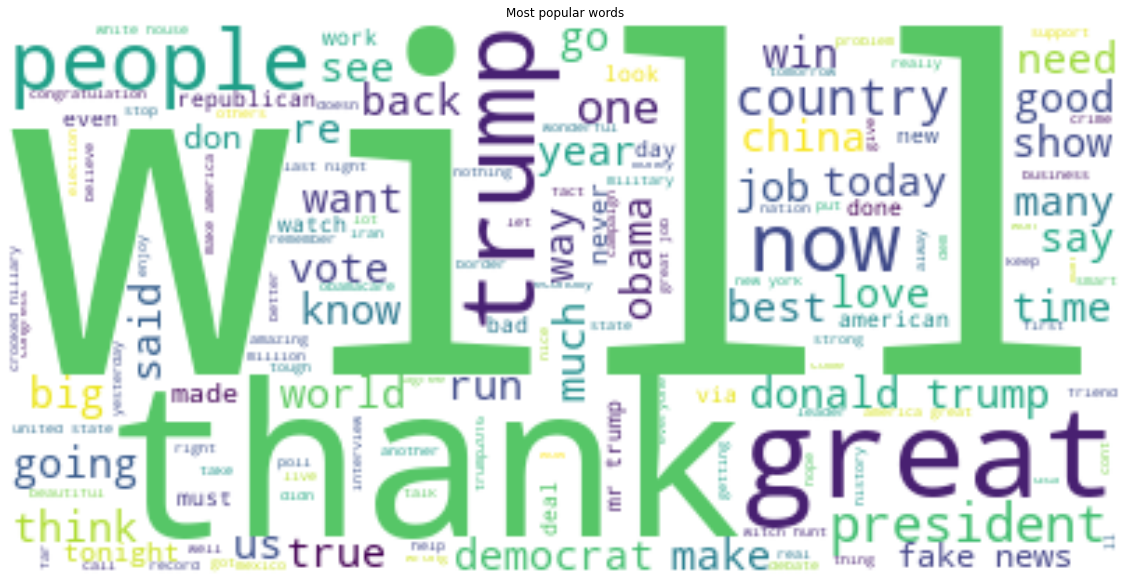

In [22]:
from wordcloud import WordCloud
data['clean_text']=data.content.apply(lambda x: clean(x))
text=" ".join(tweet for tweet in data['clean_text'])
wordcloud=WordCloud(max_font_size=2000, max_words=2000, background_color='white',random_state=42).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most popular words')
plt.show()

In [23]:
data['len_clean_text']=data.clean_text.apply(len)
data['len_clean_text'].describe()

count    43352.000000
mean       101.517277
std         65.161266
min          0.000000
25%         59.000000
50%         94.000000
75%        125.000000
max        278.000000
Name: len_clean_text, dtype: float64

In [24]:
fig1=px.scatter(data[data['favorites']>200000],x='len_clean_text',y='favorites', title='Length vs Favorites')
fig1.show()
fig2=px.scatter(data[data['retweets']>75000],x='len_clean_text', y='retweets' , title='Length vs Retweets')
fig2.show()

<h2>Tweeting Habits<h2>

In [25]:
#add day of week column
data['day_of_week']=data['date'].dt.day_name()

In [26]:
data[data['day_of_week']=='Monday'].shape[0]
tweet_days={}
for day in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
    tweet_days[day]=data[data['day_of_week']==day].shape[0]
tweet_days=pd.Series(tweet_days, name='num_tweets')
tweet_days.index.name='day'

In [27]:
fig=px.bar(tweet_days, x=tweet_days.index, y=tweet_days, labels={'x':'Day','y':'Number of tweets'})
fig.show()

In [28]:
data['per_month']=data.date.dt.to_period('M')

def group_sum(date):
    return data[data['per_month']==date].shape[0]

monthly_tweets=pd.DataFrame(data['per_month'].unique(), columns=['date_month'])
monthly_tweets['num_tweets']=monthly_tweets['date_month'].apply(group_sum)
monthly_tweets

date_month  num_tweets
0      2009-05          21
1      2009-06          11
2      2009-07           5
3      2009-08           7
4      2009-09           3
..         ...         ...
129    2020-02         377
130    2020-03         426
131    2020-04         363
132    2020-05         549
133    2020-06         319

[134 rows x 2 columns]

In [29]:
fig=px.bar(x=monthly_tweets['date_month'].apply(str), y=monthly_tweets['num_tweets'], hover_name=monthly_tweets['date_month'].apply(str), hover_data={'Daily':round(monthly_tweets['num_tweets']/monthly_tweets['date_month'].dt.days_in_month,1)}, title='Monthly tweets over time')

fig.show()

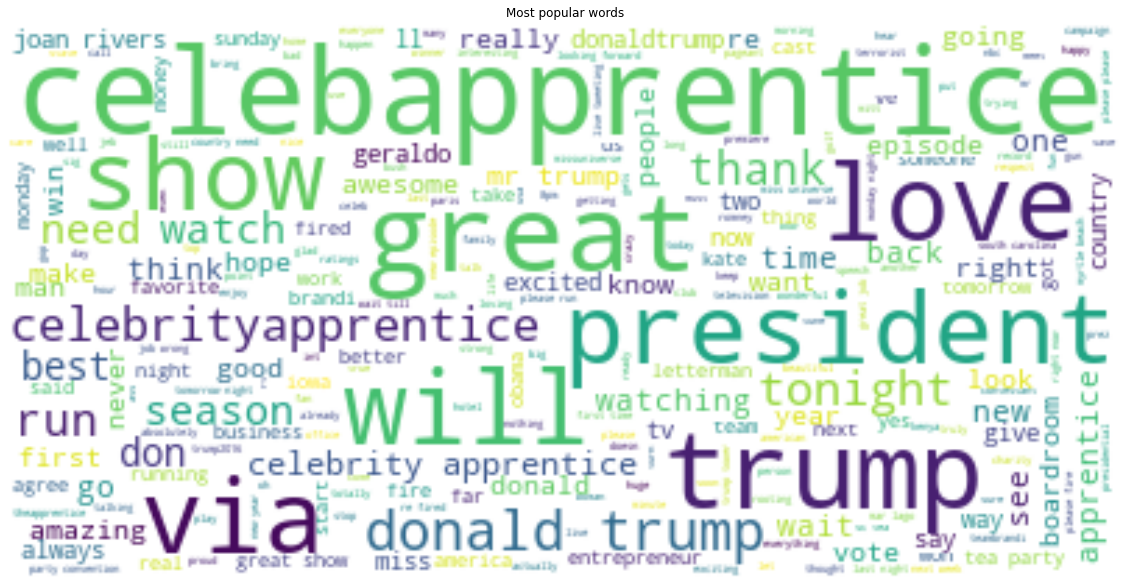

In [30]:
text_jan15=" ".join(tweet for tweet in data[data['per_month']=='2015-01'].clean_text)
wordcloud=WordCloud(max_font_size=2000, max_words=2000, background_color='white',random_state=42).generate(text_jan15)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most popular words')
plt.show()